# Importing all the necessary modules

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import numpy as np

# Downloading the CIFAR10 dataset

## The CIFAR-10 dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.




In [8]:
def download_CIFAR10_dataset():
    """Downloads the CIFAR-10 dataset in the data folder and returns training data and testing data."""
    train_data = datasets.CIFAR10(
        root = "data",
        download=True,
        train=True,
        transform=ToTensor()
    )
    validation_data = datasets.CIFAR10(
        root = "data",
        download=True,
        train=False,
        transform=ToTensor()
    ) 

    return train_data,validation_data

In [3]:
train_data, validation_data = download_CIFAR10_dataset()
print(train_data,validation_data)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor() Dataset CIFAR10
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()


# Making DataLoader Wraper for train data to load data in batches

In [4]:
BATCH_SIZE = 9

train_data_loader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)

# Visualizing the CIFAR-10 dataset

In [5]:
dataiter = iter(train_data_loader)
inputs,labels = next(dataiter)

In [6]:
inputs.shape

torch.Size([9, 3, 32, 32])

In [7]:
images = inputs.numpy()

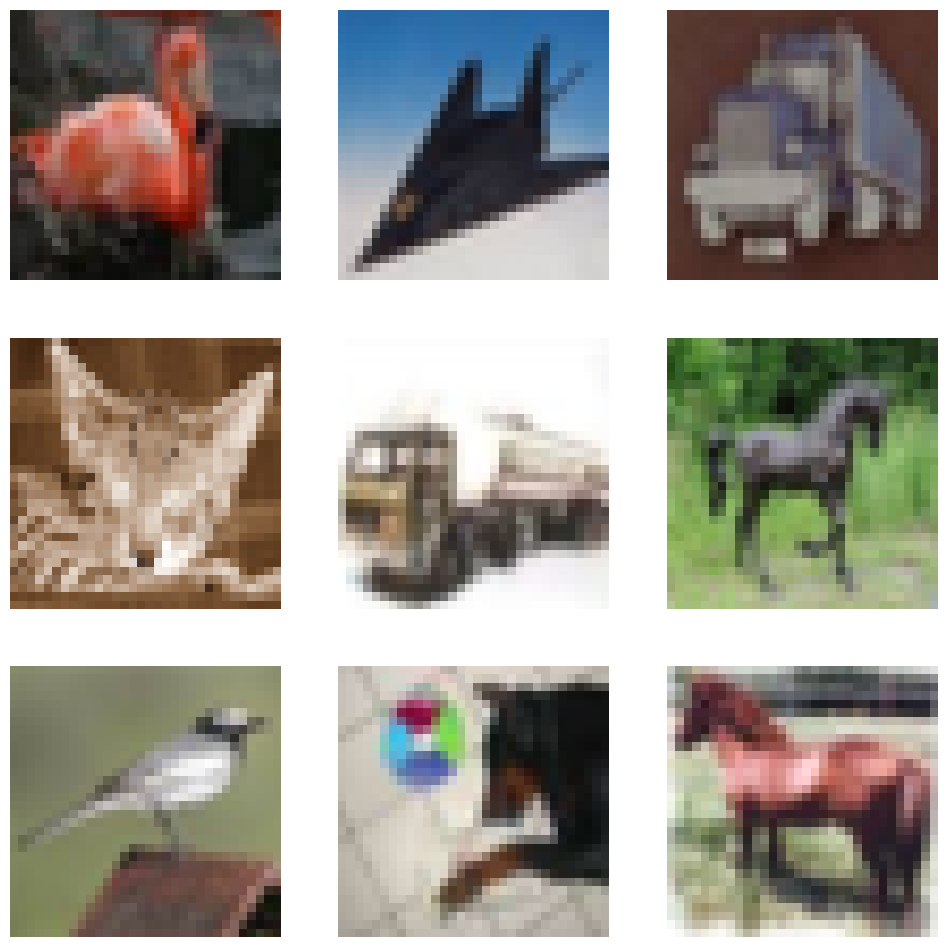

In [8]:
fig, axes = plt.subplots(3,3,figsize = (10,10))
fig.tight_layout()

for i in range(9):
    img = images[i]
    ax = axes[i//3,i%3]
    ax.imshow(np.transpose(img,(1,2,0)))
    ax.axis(False)
plt.show()

# Defining the Convolution model

In [4]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        self.flatten = nn.Flatten()
        self.dense_layers =  nn.Sequential(
            nn.Linear(16*5*5,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,10)
        )

    def forward(self,inputs):
        x = self.conv_block1(inputs)
        x = self.conv_block2(x)
        x = self.flatten(x)
        x = self.dense_layers(x)
        return x

In [10]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [11]:
device

'cpu'

In [12]:
model = ConvNet().to(device)

# Selecting the loss function and optimizer and also setting the hyperparameters 

In [13]:
LEARNING_RATE = 0.01
BATCH_SIZE = 100
EPOCHS = 20

In [14]:
train_data_loader = DataLoader(train_data,batch_size=BATCH_SIZE)

In [15]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(),lr = LEARNING_RATE)

# Defining the Training Loop

In [16]:
def train_one_epoch(model,data_loader,loss_fn,optimizer,device):
    for inputs,targets in data_loader:
        inputs = inputs.to(device)
        targets = targets.to(device)

        predictions = model(inputs)
        loss = loss_fn(predictions,targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Loss = { loss.item() }")

def train(model,data_loader,loss_fn,optimizer,device,epochs):
    for i in range(epochs):
        print(f"Epochs = {i+1}")
        train_one_epoch(model,data_loader,loss_fn,optimizer,device)
        print("------------------------------------------")
    print("Training completer")

# Training the model

In [17]:
train(model,train_data_loader,loss_fn,optimizer,device,epochs=EPOCHS)

Epochs = 1
Loss = 2.3023366928100586
------------------------------------------
Epochs = 2
Loss = 2.3014981746673584
------------------------------------------
Epochs = 3
Loss = 2.299323081970215
------------------------------------------
Epochs = 4
Loss = 2.28778076171875
------------------------------------------
Epochs = 5
Loss = 2.144449234008789
------------------------------------------
Epochs = 6
Loss = 2.1674115657806396
------------------------------------------
Epochs = 7
Loss = 2.161870002746582
------------------------------------------
Epochs = 8
Loss = 2.1589295864105225
------------------------------------------
Epochs = 9
Loss = 2.1454131603240967
------------------------------------------
Epochs = 10
Loss = 2.1090545654296875
------------------------------------------
Epochs = 11
Loss = 2.0278494358062744
------------------------------------------
Epochs = 12
Loss = 1.9251949787139893
------------------------------------------
Epochs = 13
Loss = 1.838591456413269
-----

# Saving the trained Model

In [18]:
torch.save(model.state_dict(),"CONV_NET.pth")

# Making predictions with the model

In [2]:
class_mapping = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [5]:
loaded_model = ConvNet()

In [6]:
state_dict = torch.load("CONV_NET_v2.pth",map_location=torch.device('cpu'))
loaded_model.load_state_dict(state_dict)

<All keys matched successfully>

In [9]:
_,validation_data = download_CIFAR10_dataset()

In [10]:
rand_num = np.random.randint(0,10000-1)
print(rand_num)

2929


In [11]:
input, target = validation_data[rand_num][0], validation_data[rand_num][1]
print(input)
npimg = input.numpy()

tensor([[[0.9529, 0.9255, 0.9216,  ..., 0.9255, 0.8980, 0.8667],
         [0.9647, 0.9412, 0.9373,  ..., 0.9451, 0.9059, 0.8627],
         [0.9647, 0.9451, 0.9373,  ..., 0.9569, 0.9333, 0.9059],
         ...,
         [0.3765, 0.2000, 0.1412,  ..., 0.3765, 0.3686, 0.3647],
         [0.3569, 0.3098, 0.2784,  ..., 0.3765, 0.3725, 0.3843],
         [0.4078, 0.3725, 0.3647,  ..., 0.3569, 0.3608, 0.3608]],

        [[0.9569, 0.9294, 0.9255,  ..., 0.9216, 0.8941, 0.8627],
         [0.9686, 0.9451, 0.9412,  ..., 0.9412, 0.9020, 0.8588],
         [0.9686, 0.9490, 0.9412,  ..., 0.9569, 0.9333, 0.9059],
         ...,
         [0.3882, 0.2118, 0.1529,  ..., 0.3882, 0.3804, 0.3765],
         [0.3686, 0.3216, 0.2902,  ..., 0.3882, 0.3882, 0.3961],
         [0.4196, 0.3843, 0.3765,  ..., 0.3804, 0.3765, 0.3765]],

        [[0.9725, 0.9490, 0.9412,  ..., 0.9412, 0.9176, 0.8863],
         [0.9843, 0.9608, 0.9569,  ..., 0.9569, 0.9216, 0.8784],
         [0.9765, 0.9608, 0.9529,  ..., 0.9686, 0.9412, 0.

(np.float64(-0.5), np.float64(31.5), np.float64(31.5), np.float64(-0.5))

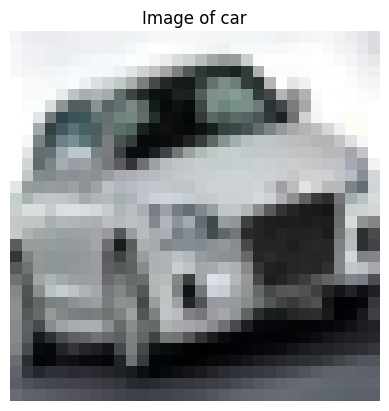

In [12]:
plt.imshow(np.transpose(npimg,(1,2,0)))
plt.title(f"Image of {class_mapping[target]}")
plt.axis(False)

In [13]:
def predict(model,input,target,class_mapping):
    model.eval()
    with torch.no_grad():
        predictions = model(input)
        predicted_index = predictions[0].argmax(0)
        predicted = class_mapping[predicted_index]
        expected = class_mapping[target]
    return predicted,expected

In [14]:
input = input.unsqueeze(0)

In [15]:
predicted,expected = predict(loaded_model,input,target,class_mapping)
print(f"Predicted: {predicted}, Expected: {expected}")

Predicted: car, Expected: car


In [16]:
input

tensor([[[[0.9529, 0.9255, 0.9216,  ..., 0.9255, 0.8980, 0.8667],
          [0.9647, 0.9412, 0.9373,  ..., 0.9451, 0.9059, 0.8627],
          [0.9647, 0.9451, 0.9373,  ..., 0.9569, 0.9333, 0.9059],
          ...,
          [0.3765, 0.2000, 0.1412,  ..., 0.3765, 0.3686, 0.3647],
          [0.3569, 0.3098, 0.2784,  ..., 0.3765, 0.3725, 0.3843],
          [0.4078, 0.3725, 0.3647,  ..., 0.3569, 0.3608, 0.3608]],

         [[0.9569, 0.9294, 0.9255,  ..., 0.9216, 0.8941, 0.8627],
          [0.9686, 0.9451, 0.9412,  ..., 0.9412, 0.9020, 0.8588],
          [0.9686, 0.9490, 0.9412,  ..., 0.9569, 0.9333, 0.9059],
          ...,
          [0.3882, 0.2118, 0.1529,  ..., 0.3882, 0.3804, 0.3765],
          [0.3686, 0.3216, 0.2902,  ..., 0.3882, 0.3882, 0.3961],
          [0.4196, 0.3843, 0.3765,  ..., 0.3804, 0.3765, 0.3765]],

         [[0.9725, 0.9490, 0.9412,  ..., 0.9412, 0.9176, 0.8863],
          [0.9843, 0.9608, 0.9569,  ..., 0.9569, 0.9216, 0.8784],
          [0.9765, 0.9608, 0.9529,  ..., 0